In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import numpy as np
import json
import time
import datetime
import matplotlib.dates as mdate
from config import api_key
import csv
from scipy.stats import linregress
import os

In [20]:
# Get state (province) for China
#api.airvisual.com/v2/states?country={{COUNTRY_NAME}}&key={{YOUR_API_KEY}}
url2 = "https://api.airvisual.com/v2/states?country=China"
#query_url2
query_url2 = url2 + "&key="+ api_key  

In [21]:
# Put results to response2
response2 = requests.get(query_url2).json()
    
    

# Display the data
pprint(response2)

{'data': [{'state': 'Anhui'},
          {'state': 'Beijing'},
          {'state': 'Chongqing'},
          {'state': 'Fujian'},
          {'state': 'Gansu'},
          {'state': 'Guangdong'},
          {'state': 'Guangxi'},
          {'state': 'Guizhou'},
          {'state': 'Hainan'},
          {'state': 'Hebei'},
          {'state': 'Heilongjiang'},
          {'state': 'Henan'},
          {'state': 'Hubei'},
          {'state': 'Hunan'},
          {'state': 'Inner Mongolia'},
          {'state': 'Jiangsu'},
          {'state': 'Jiangxi'},
          {'state': 'Jilin'},
          {'state': 'Liaoning'},
          {'state': 'Ningxia'},
          {'state': 'Qinghai'},
          {'state': 'Shaanxi'},
          {'state': 'Shandong'},
          {'state': 'Shanghai'},
          {'state': 'Shanxi'},
          {'state': 'Sichuan'},
          {'state': 'Tianjin'},
          {'state': 'Tibet'},
          {'state': 'Xinjiang'},
          {'state': 'Yunnan'},
          {'state': 'Zhejiang'}],
 'stat

In [5]:
# Get the China Hubei cities list (and do this for other states)
url = "https://api.airvisual.com/v2/cities?state=Hubei&country=China&key="
# Build query URL
query_url = url + api_key

# Get the citiy list for China Hubei
cities_response = requests.get(query_url)
china_hubei_city = cities_response.json()
pprint(china_hubei_city)

{'data': [{'city': 'Enshi'},
          {'city': 'Ezhou'},
          {'city': 'Huanggang'},
          {'city': 'Huangshi'},
          {'city': 'Jingmen'},
          {'city': 'Jingzhou'},
          {'city': 'Shashi'},
          {'city': 'Shiyan'},
          {'city': 'Suizhou'},
          {'city': 'Wuhan'},
          {'city': 'Xiangyang'},
          {'city': 'Xianning'},
          {'city': 'Xiaogan'},
          {'city': 'Yichang'}],
 'status': 'success'}


In [6]:
# Print the city list dict.
china_hubei_city_list = china_hubei_city["data"]
print(china_hubei_city_list)

[{'city': 'Enshi'}, {'city': 'Ezhou'}, {'city': 'Huanggang'}, {'city': 'Huangshi'}, {'city': 'Jingmen'}, {'city': 'Jingzhou'}, {'city': 'Shashi'}, {'city': 'Shiyan'}, {'city': 'Suizhou'}, {'city': 'Wuhan'}, {'city': 'Xiangyang'}, {'city': 'Xianning'}, {'city': 'Xiaogan'}, {'city': 'Yichang'}]


In [7]:
# Create China Hubei city list
city =[ china_hubei_city_list["city"] for china_hubei_city_list in china_hubei_city_list]
print(city)

['Enshi', 'Ezhou', 'Huanggang', 'Huangshi', 'Jingmen', 'Jingzhou', 'Shashi', 'Shiyan', 'Suizhou', 'Wuhan', 'Xiangyang', 'Xianning', 'Xiaogan', 'Yichang']


In [9]:
# Create the base url
url = "https://api.airvisual.com/v2/city?city="

# Create an output list to hold request results
output = []

# Loop through the cities to perform requests
for c in city:
    query_url = url + c  +"&state=Hubei&country=China&" + "&key=" + api_key  
    response = requests.get(query_url).json()
    
    # Put results to the output list
    output.append(response)
    
    time.sleep(10)

# Display the data
pprint(output)

[{'data': {'city': 'Enshi',
           'country': 'China',
           'current': {'pollution': {'aqicn': 20,
                                     'aqius': 55,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-09T17:00:00.000Z'},
                       'weather': {'hu': 91,
                                   'ic': '10n',
                                   'pr': 1013,
                                   'tp': 14,
                                   'ts': '2019-10-09T18:00:00.000Z',
                                   'wd': 146,
                                   'ws': 2.1}},
           'location': {'coordinates': [109.478931, 30.278325],
                        'type': 'Point'},
           'state': 'Hubei'},
  'status': 'success'},
 {'data': {'city': 'Ezhou',
           'country': 'China',
           'current': {'pollution': {'aqicn': 55,
                                     'aqius': 

In [13]:
# Create lists to hold necessary data
city_name = []
state = []
country_name = []
air_quality = []
main_pollutant = []
humidity = []
pressure = []
temperature = []
wind_speed = []
date = []
lat = []
lng = []

# Select the variables and put them in relative lists
for i in range(len(output)):
    city_name.append(output[i]['data']['city'])    
    state.append(output[i]['data']['state'])
    country_name.append(output[i]['data']['country'])
    air_quality.append(output[i]['data']['current']['pollution']['aqius'])
    humidity.append(output[i]['data']['current']['weather']['hu'])
    pressure.append(output[i]['data']['current']['weather']['pr'])
    temperature.append(output[i]['data']['current']['weather']['tp'])
    wind_speed.append(output[i]['data']['current']['weather']['ws'])
    date.append(output[i]['data']['current']['pollution']['ts'])
    main_pollutant.append(output[i]['data']['current']['pollution']['mainus'])
    lat.append(output[i]['data']['location']['coordinates'][0])
    lng.append(output[i]['data']['location']['coordinates'][1])

In [12]:
# Create the dictionary to hold data
air_data = {"City": city_name,
             "State": state,
             "Country": country_name,
             "Latitude": lat,
             "Longitude": lng,
             "Air Quality": air_quality,
             "Main Pollutant": main_pollutant,
             "Humidity": humidity,
             "Pressure": pressure,
             "Temperature": temperature,
             "Wind Speed": wind_speed,
             "Date": date
           }
# Convert dictionary to a dataframe
air_df = pd.DataFrame(air_data)
air_df

,City,State,Country,Latitude,Longitude,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Enshi,Hubei,China,109.478931,30.278325,55,p2,91,1013,14,2.10,2019-10-09T17:00:00.000Z
1,Ezhou,Hubei,China,114.848449,30.421269,74,p2,64,1013,21,1.06,2019-10-09T15:00:00.000Z
2,Huanggang,Hubei,China,114.906618,30.446109,69,p2,64,1013,21,1.06,2019-10-09T15:00:00.000Z
3,Huangshi,Hubei,China,115.050683,30.216127,61,p2,61,1013,21,1.88,2019-10-09T15:00:00.000Z
4,Jingmen,Hubei,China,112.233191,31.041171,77,p2,74,1013,17,3.36,2019-10-09T15:00:00.000Z
5,Jingzhou,Hubei,China,112.099857,30.396103,72,p2,80,1005,18,3.75,2019-10-09T15:00:00.000Z
6,Shashi,Hubei,China,112.244720,30.307220,76,p2,80,1005,18,3.75,2019-10-09T15:00:00.000Z
7,Shiyan,Hubei,China,111.065093,33.226796,54,p2,90,1016,12,1.51,2019-10-09T15:00:00.000Z
8,Suizhou,Hubei,China,113.379358,31.717858,72,p2,74,1013,18,1.70,2019-10-09T15:00:00.000Z
9,Wuhan,Hubei,China,114.444495,30.633205,69,p2,78,1013,22,1.00,2019-10-09T15:00:00.000Z


In [12]:
# Check to data types
print(air_df.dtypes)

City               object
State              object
Country            object
Latitude          float64
Longitude         float64
Air Quality         int64
Main Pollutant     object
Humidity            int64
Pressure            int64
Temperature         int64
Wind Speed        float64
Date               object
dtype: object


In [14]:
# Convert date data type to datetime and select only date values
air_df["Date"] = pd.to_datetime(air_df["Date"])
air_df["Date"] = air_df["Date"].dt.date
# Display the data frame with new date values
air_df

,City,State,Country,Latitude,Longitude,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Enshi,Hubei,China,109.478931,30.278325,55,p2,91,1013,14,2.10,2019-10-09
1,Ezhou,Hubei,China,114.848449,30.421269,74,p2,64,1013,21,1.06,2019-10-09
2,Huanggang,Hubei,China,114.906618,30.446109,69,p2,64,1013,21,1.06,2019-10-09
3,Huangshi,Hubei,China,115.050683,30.216127,61,p2,61,1013,21,1.88,2019-10-09
4,Jingmen,Hubei,China,112.233191,31.041171,77,p2,74,1013,17,3.36,2019-10-09
5,Jingzhou,Hubei,China,112.099857,30.396103,72,p2,80,1005,18,3.75,2019-10-09
6,Shashi,Hubei,China,112.244720,30.307220,76,p2,80,1005,18,3.75,2019-10-09
7,Shiyan,Hubei,China,111.065093,33.226796,54,p2,90,1016,12,1.51,2019-10-09
8,Suizhou,Hubei,China,113.379358,31.717858,72,p2,74,1013,18,1.70,2019-10-09
9,Wuhan,Hubei,China,114.444495,30.633205,69,p2,78,1013,22,1.00,2019-10-09


In [15]:
# Save the dataframe as csv
china_hubei_air_quality = air_df.to_csv("output/china_hubei_air_quality.csv", index=False, header=True)

In [38]:
# Group by main air polutants to use data to identify pollutants for China Hubei cities
air_pollutant_df = air_df.groupby(["Main Pollutant"], as_index=False)
grouped_df = air_pollutant_df.count().head()
grouped_df

,Main Pollutant,City,State,Country,Latitude,Longitude,Air Quality,Humidity,Pressure,Temperature,Wind Speed,Date
0,p2,14,14,14,14,14,14,14,14,14,14,14


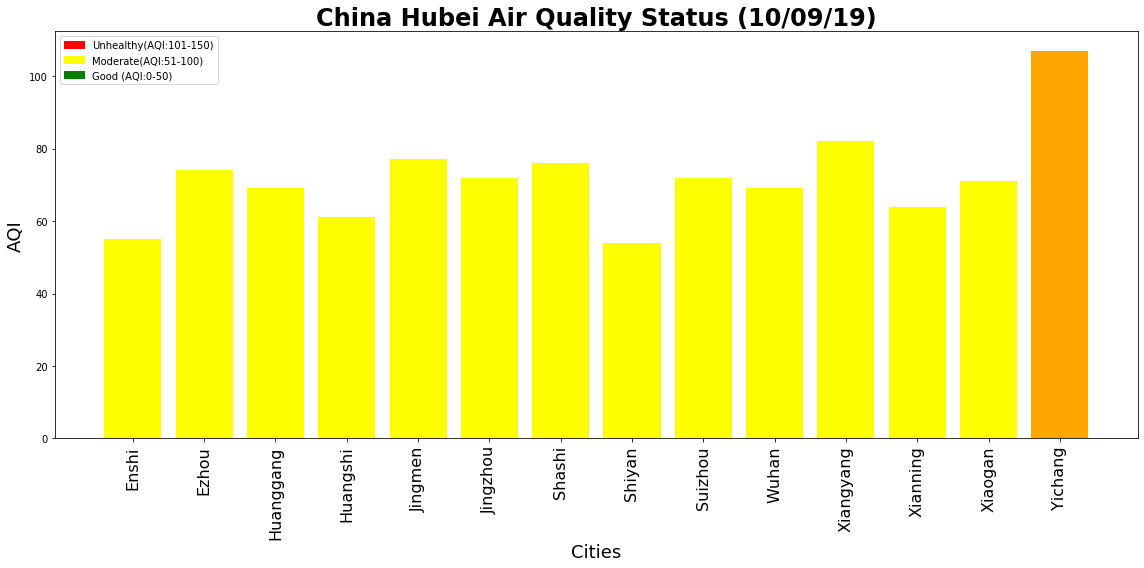

In [37]:
# Create a line chart to show air quality index change for each city
# Change the color depending on the air quality index
plt.figure(figsize=(16,8))

colors = ["green" if x <= 50 else "yellow" if x <= 100 else "orange" for x in air_df["Air Quality"]]
plt.bar(air_df["City"], air_df["Air Quality"], align="center", color = colors)

# Add labels 
plt.xticks(air_df["City"], rotation = 90,fontsize=16)
plt.title("China Hubei Air Quality Status (%s)" % time.strftime("%x"), fontweight="bold", fontsize=24)
plt.ylabel("AQI", fontsize=18)
plt.xlabel("Cities", fontsize=18)

# Add lagend
colors1 = {"Unhealthy(AQI:101-150)": "red", "Moderate(AQI:51-100)": "yellow", "Good (AQI:0-50)": "green"}
labels = list(colors1.keys())
handles= [plt.Rectangle((0,0),1,1, color=colors1[label]) for label in labels]
plt.legend(handles,labels)



# Save the plot
plt.tight_layout()
plt.savefig("Output/China_hubei_air_quality.png")
plt.show()

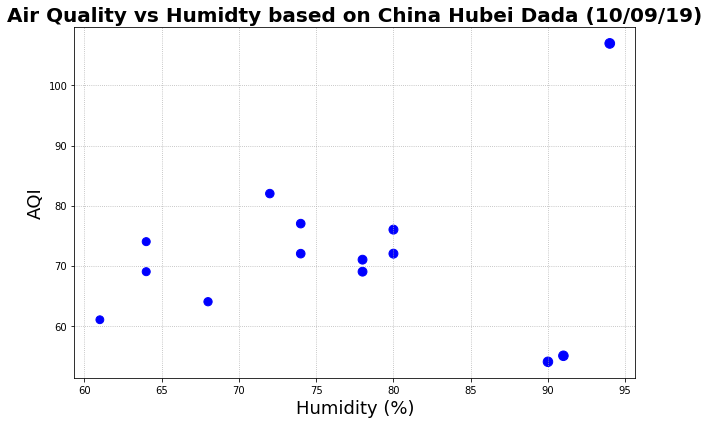

In [39]:

# Create the plot
plt.figure(figsize=(10,6))
plt.scatter(air_df["Humidity"], air_df["Air Quality"], marker = "o", color = "blue", s=air_df["Humidity"])

                                                

# Add Labels
plt.title("Air Quality vs Humidty based on China Hubei Dada (%s)" % time.strftime("%x"), fontweight="bold", fontsize=20)
plt.xlabel("Humidity (%)", fontsize=18)
plt.ylabel("AQI", fontsize=18)
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/China_Hubei_aqi_humidity.png")
plt.show()

### Air Quality, Temperature Relationship

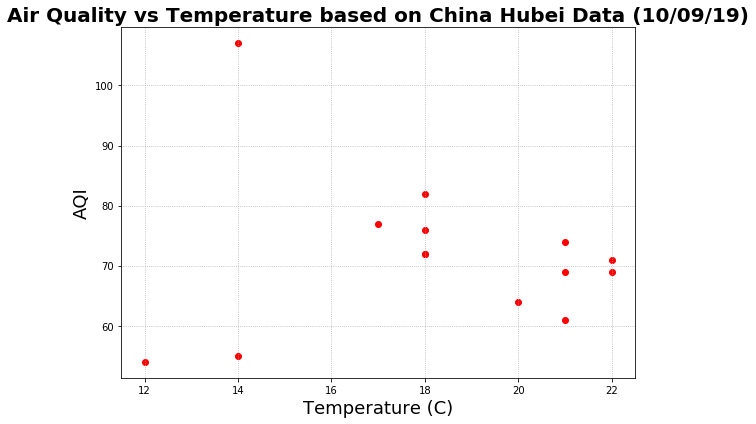

In [40]:

# Create plots for temprature and air quality 
plt.figure(figsize=(10,6))
plt.scatter(air_df["Temperature"], air_df["Air Quality"], marker="o", color = "red")

# Add Labels
plt.xlabel("Temperature (C)", fontsize=18)
plt.ylabel("AQI", fontsize=18)
plt.title("Air Quality vs Temperature based on China Hubei Data (%s)" % time.strftime("%x"), fontweight="bold", fontsize=20)
tick_locations = air_df["Temperature"]
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/Chia_Hubei_aqi_temp.png")
plt.show()

### Air Quality,  Air Pressure Relationship


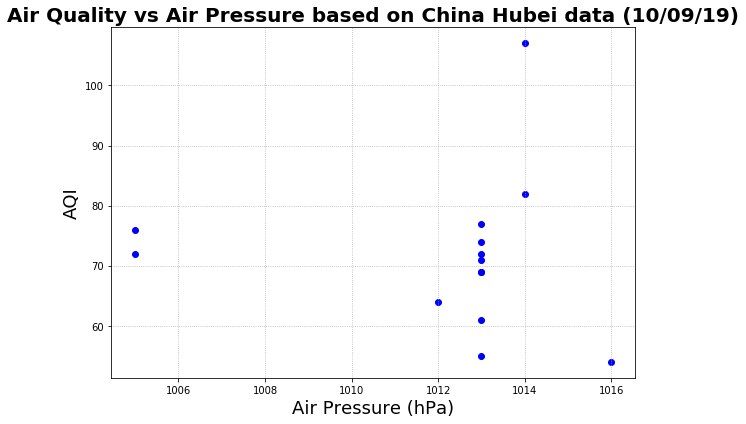

In [41]:

# Create plots for temprature and air quality 
plt.figure(figsize=(10,6))
plt.scatter(air_df["Pressure"], air_df["Air Quality"], marker="o", color = "blue")

# Add labels
plt.xlabel("Air Pressure (hPa)", fontsize=18)
plt.ylabel("AQI", fontsize=18)
plt.title("Air Quality vs Air Pressure based on China Hubei data (%s)" % time.strftime("%x"), fontweight="bold", fontsize=20)
tick_locations = air_df["Pressure"]
plt.grid(linestyle=":")

# Save the plot
plt.tight_layout()
plt.savefig("Output/China_Hubei_aqi_pressure.png")
plt.show()